In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import pandas as pd
import numpy as np
import sys
from io import StringIO
import glob
if not hasattr(sys, "version_info") or sys.version_info < (3, 5):
  raise SystemExit("This program requires Python 3.5 or later.")
import csv
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import os
## https://github.com/ipython/ipyparallel
import ipyparallel as ipp
workers = ipp.Client()[:]
data_files = glob.glob("data[0-9][0-9][0-9].csv")
csvDelimiter = ";"
dataTypes = {'time': 'datetime64','humidity': 'float', 'temperature': 'float'}
dataHeaders = ['time','humidity', 'temperature']
data_files

['data000.csv', 'data001.csv', 'data002.csv', 'data003.csv', 'data004.csv']

In [2]:
%%time
## raw data merge
def readPart(fname):
    import numpy as np
    import pandas as pd
    from io import StringIO
    dataTypes = {'time': 'datetime64','humidity': 'float', 'temperature': 'float'}
    csvDelimiter = ";"
    with open(fname, 'r', newline='') as infile:
        indata = infile.read().replace(",", ".")
        return (fname, pd.read_csv(StringIO(indata), sep = csvDelimiter).astype(dataTypes))
    
parts = workers.map_async(readPart, [("%s/%s" % (os.getcwd(), f)) for f in data_files]).get()
npdata = []
frames = []
for filename, frame in parts:
    l = frame.values.tolist()
    frame.columns = dataHeaders
    frames.append(frame)
    npdata.extend(l)

temperature_data = pd.DataFrame(npdata)
temperature_data.columns = dataHeaders

CPU times: user 6.59 s, sys: 205 ms, total: 6.8 s
Wall time: 1min 3s


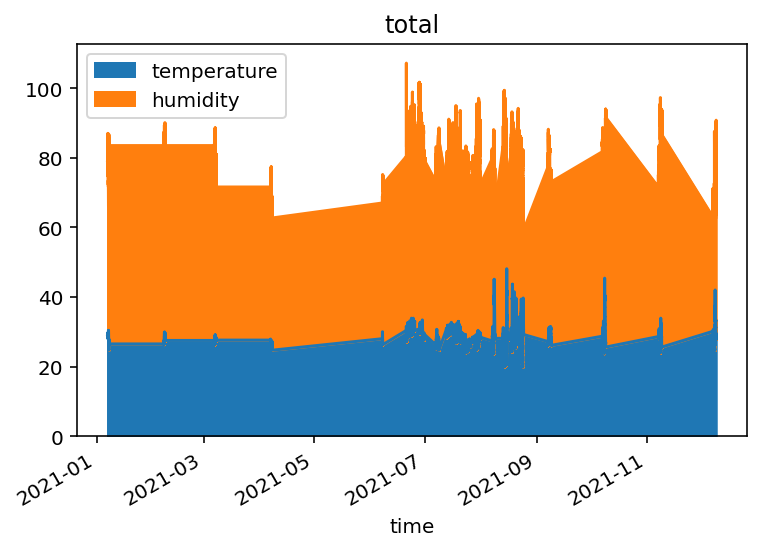

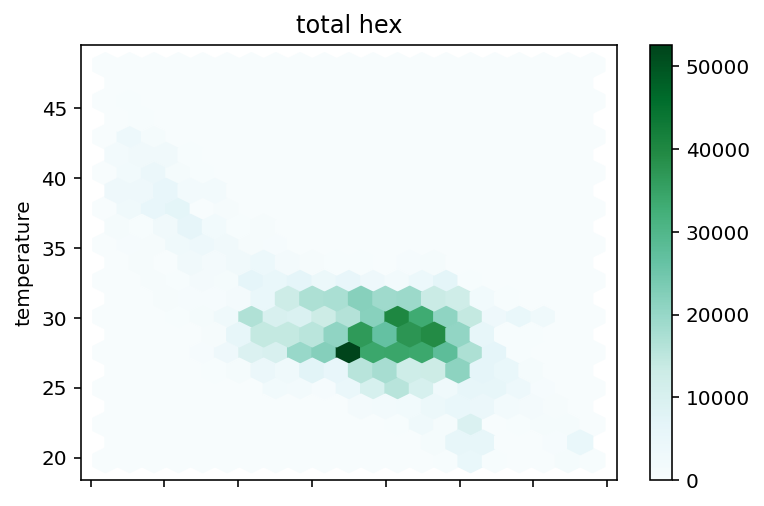

CPU times: user 10.4 s, sys: 402 ms, total: 10.8 s
Wall time: 10.9 s


In [3]:
%%time
temperature_data.plot.area(x="time", y=["temperature", "humidity"])
plt.title("total")
plt.show()
temperature_data.plot.hexbin(x="humidity", y="temperature", gridsize=20)
plt.title("total hex")
plt.show()

<AxesSubplot:>

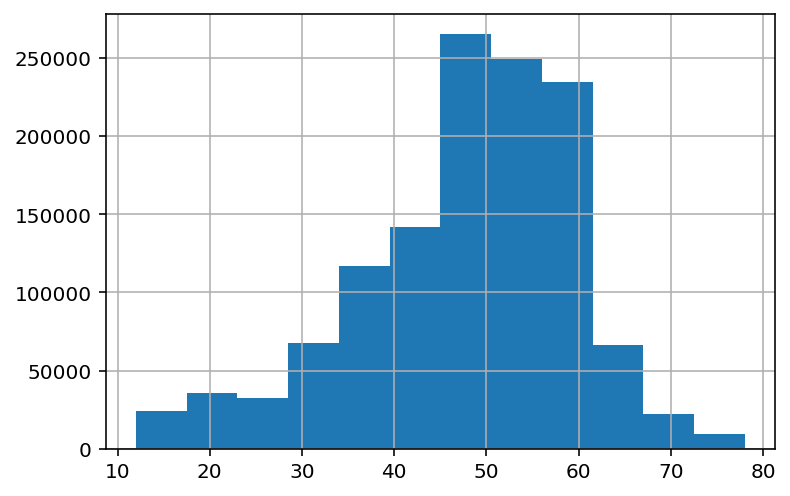

In [4]:
temperature_data['humidity'].hist(bins=12)

<AxesSubplot:>

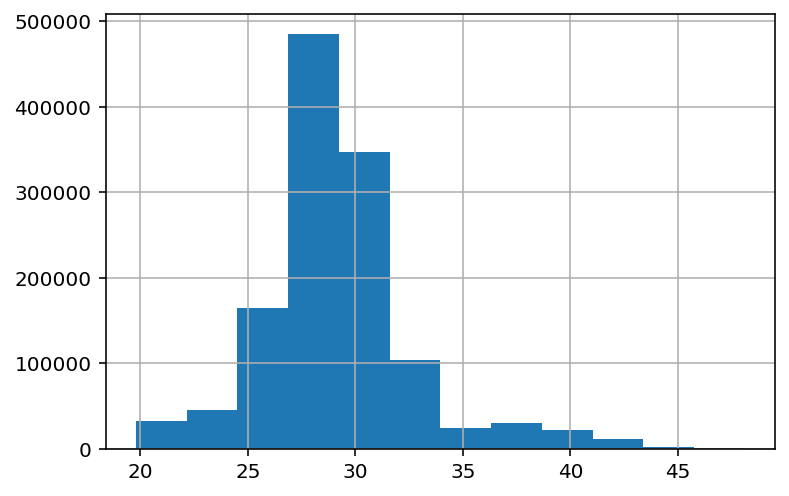

In [5]:
temperature_data['temperature'].hist(bins=12)

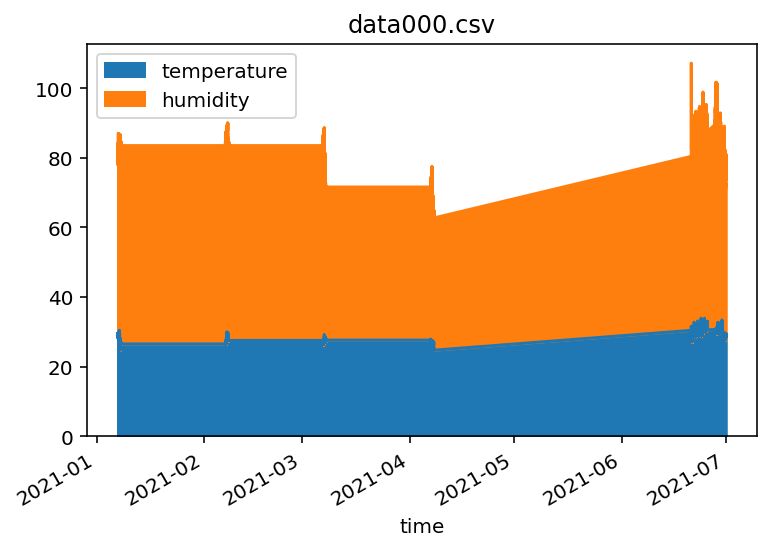

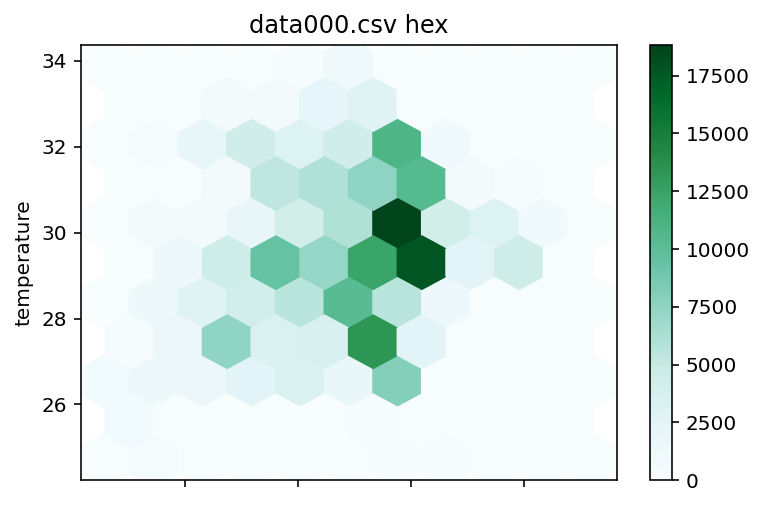

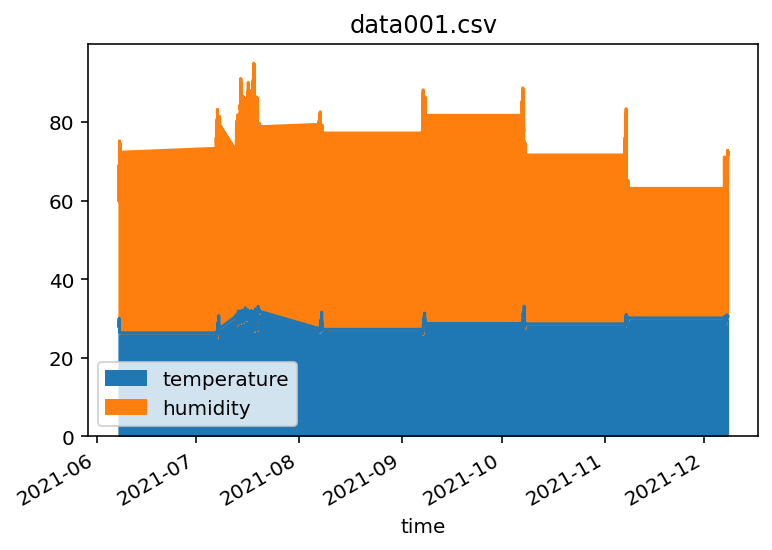

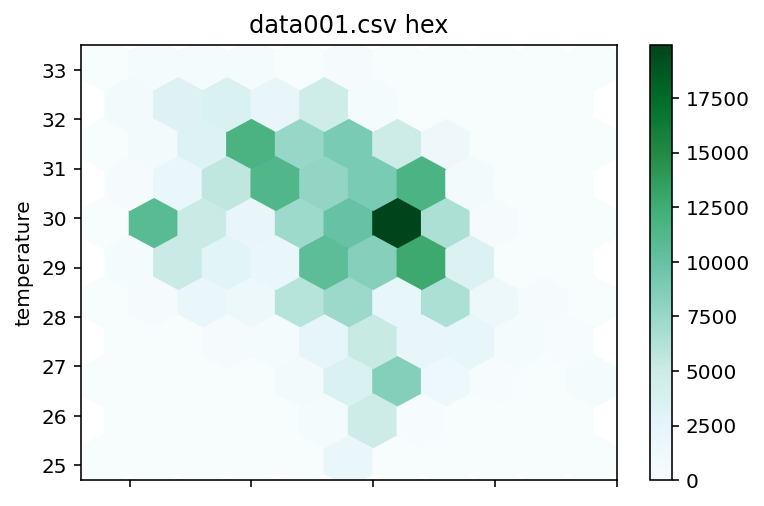

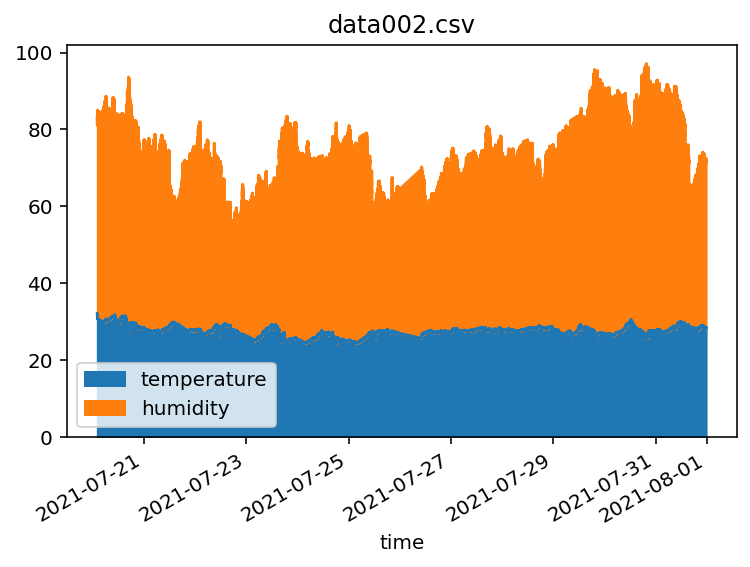

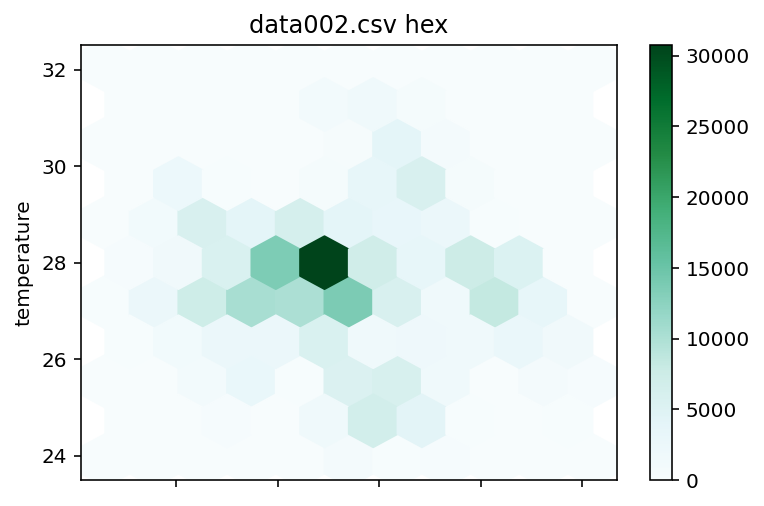

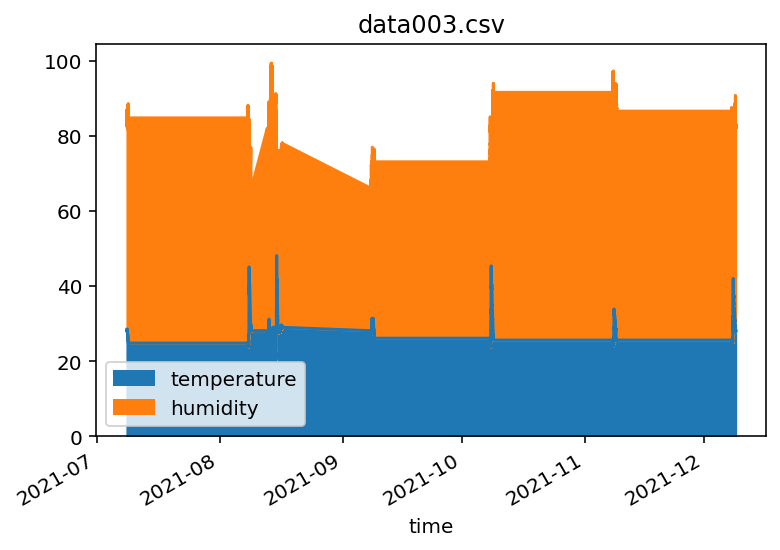

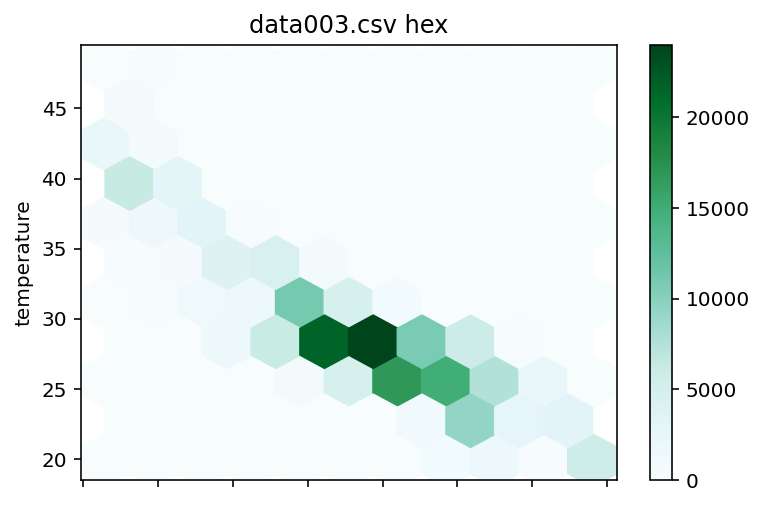

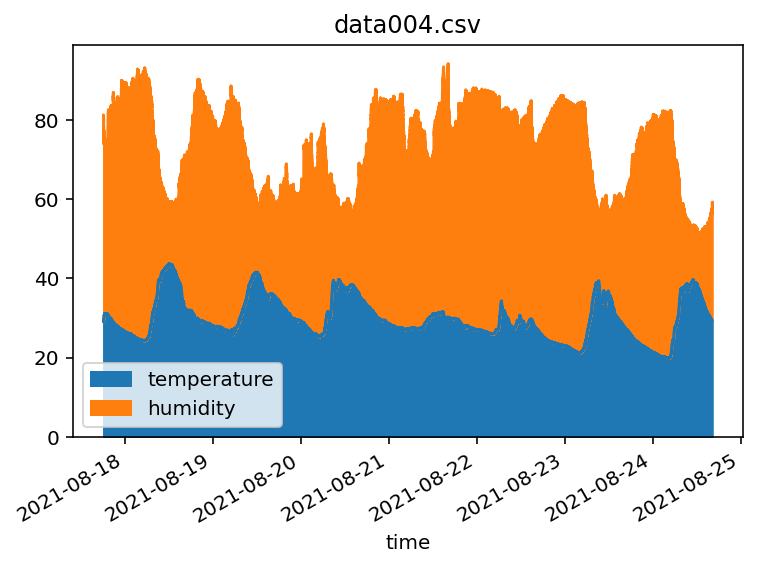

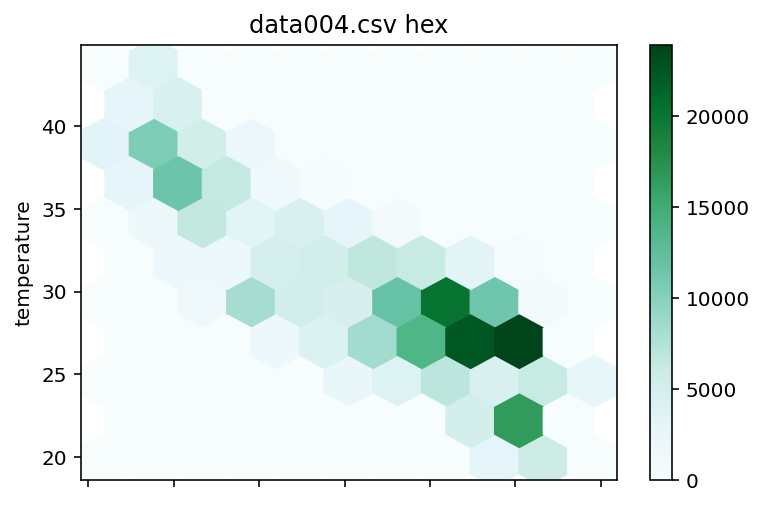

CPU times: user 12.9 s, sys: 90.1 ms, total: 13 s
Wall time: 13 s


In [6]:
%%time
i = 0
for frame in frames:
    frame.plot.area(x="time", y=["temperature", "humidity"])
    plt.title(data_files[i])
    plt.show()
    frame.plot.hexbin(x="humidity", y="temperature", gridsize=10)
    plt.title("%s hex" % data_files[i])
    plt.show()
    i += 1